In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\HP\OneDrive\ドキュメント\ict teck\iris (1).csv")

In [3]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [6]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [7]:
df.shape

(150, 5)

In [8]:
df['Classification'].nunique()

3

In [9]:
df['Classification'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Handling Missing Values

In [11]:
from sklearn.impute import SimpleImputer

In [12]:
sel_cols = df[['SL','SW','PL','PW']]

In [13]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(sel_cols)
sel_cols = imputer.transform(sel_cols)

In [14]:
type(sel_cols)

numpy.ndarray

In [15]:
sel_cols = pd.DataFrame(sel_cols, columns =['SL','SW','PL','PW'])

In [16]:
type(sel_cols)

pandas.core.frame.DataFrame

In [17]:
sel_cols.isna().sum()

SL    0
SW    0
PL    0
PW    0
dtype: int64

In [18]:
df = df.drop(['SL','SW','PL','PW'],axis =1)

In [19]:
df.head()

,Classification
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [20]:
df = pd.concat([df,sel_cols],axis = 1)

In [21]:
df.head()

,Classification,SL,SW,PL,PW
0,Iris-setosa,5.100000,3.5,1.4,0.2
1,Iris-setosa,4.900000,3.0,1.4,0.2
2,Iris-setosa,5.855944,3.2,1.3,0.2
3,Iris-setosa,4.600000,3.1,1.5,0.2
4,Iris-setosa,5.000000,3.6,1.4,0.2


In [22]:
x = df.drop(['Classification'],axis=1)
y = df['Classification']

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Classification'] = le.fit_transform(df['Classification'])

In [24]:
df.head()

,Classification,SL,SW,PL,PW
0,0,5.100000,3.5,1.4,0.2
1,0,4.900000,3.0,1.4,0.2
2,0,5.855944,3.2,1.3,0.2
3,0,4.600000,3.1,1.5,0.2
4,0,5.000000,3.6,1.4,0.2


In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

### SVM 

In [27]:
from sklearn.svm import SVC

In [28]:
svm_cls = SVC(kernel = 'linear')
svm_cls = svm_cls.fit(x_train,y_train)

In [29]:
y_pred_svm = svm_cls.predict(x_test)

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [31]:
print('Accuracy is :',accuracy_score(y_test,y_pred_svm))
print('Precision is :',precision_score(y_test,y_pred_svm,average = 'micro'))
print('Recall is :',recall_score(y_test,y_pred_svm,average = 'micro'))
print('F1 Score is :',f1_score(y_test,y_pred_svm,average='micro'))
print('confusion matrix is : ',confusion_matrix(y_test,y_pred_svm))

Accuracy is : 1.0
Precision is : 1.0
Recall is : 1.0
F1 Score is : 1.0
confusion matrix is :  [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


## Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dt_cls = DecisionTreeClassifier()
dt_cls = dt_cls.fit(x_train,y_train)
y_pred_dt = dt_cls.predict(x_test)

In [35]:
print('Accuracy is : ',accuracy_score(y_test,y_pred_dt))
print('Precision is : ',precision_score(y_test,y_pred_dt,average = 'micro'))
print('Recall is : ',recall_score(y_test,y_pred_dt,average='micro'))
print('F1 Score is : ',f1_score(y_test,y_pred_dt,average = 'micro'))
print('confusion matrix is : ',confusion_matrix(y_test,y_pred_dt))

Accuracy is :  1.0
Precision is :  1.0
Recall is :  1.0
F1 Score is :  1.0
confusion matrix is :  [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


## Random forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rf_cls = RandomForestClassifier()
rf_cls = rf_cls.fit(x_train,y_train)
y_pred_rf = rf_cls.predict(x_test)

In [39]:
print('Accuracy is : ',accuracy_score(y_test,y_pred_rf))
print('Precision is : ',precision_score(y_test,y_pred_rf,average = 'micro'))
print('Recall is : ',recall_score(y_test,y_pred_rf,average='micro'))
print('F1 Score is : ',f1_score(y_test,y_pred_rf,average = 'micro'))
print('confusion matrix is : ',confusion_matrix(y_test,y_pred_rf))

Accuracy is :  1.0
Precision is :  1.0
Recall is :  1.0
F1 Score is :  1.0
confusion matrix is :  [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


## KNN 

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
metric_k= []
neighbors = np.arange(3,15)

In [43]:
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
    classifier.fit(x_train,y_train)
    y_predictions = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_predictions)
    metric_k.append(acc)

In [44]:
metric_k

[0.9666666666666667,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

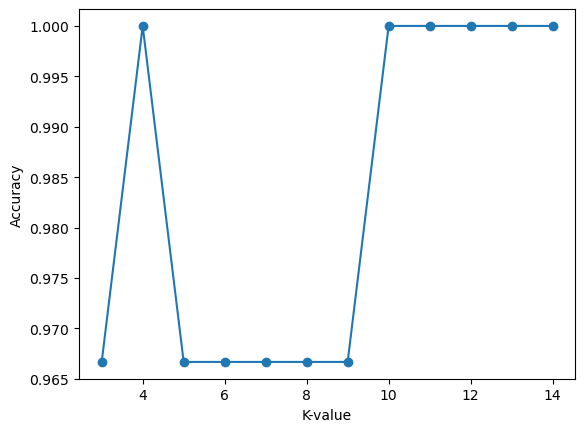

In [45]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K-value')
plt.ylabel('Accuracy')
plt.show()

In [46]:
classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'euclidean')
classifier.fit(x_train,y_train)
y_predictions = classifier.predict(x_test)

In [47]:
print('Accuracy is :',accuracy_score(y_test,y_predictions))
print('Precision is :',precision_score(y_test,y_predictions,average = 'micro'))
print('Recall is :',recall_score(y_test,y_predictions,average = 'micro'))
print('F1 Score is :',f1_score(y_test,y_predictions,average='micro'))

Accuracy is : 0.9666666666666667
Precision is : 0.9666666666666667
Recall is : 0.9666666666666667
F1 Score is : 0.9666666666666667


In [48]:
confusion_matrix(y_test,y_predictions)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

## Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg =log_reg.fit(x_train,y_train)

In [51]:
y_pred = log_reg.predict(x_test)

In [52]:
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precision is : ',precision_score(y_test,y_pred,average = 'micro'))
print('Recall is : ',recall_score(y_test,y_pred,average='micro'))
print('F1 Score is : ',f1_score(y_test,y_pred,average = 'micro'))
print('confusion matrix is : ',confusion_matrix(y_test,y_pred))

Accuracy is :  1.0
Precision is :  1.0
Recall is :  1.0
F1 Score is :  1.0
confusion matrix is :  [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


## Naive Bayes

In [54]:
from sklearn.naive_bayes import GaussianNB

In [55]:
nb_classifier = GaussianNB()
nb_classifier.fit(x_train,y_train)

GaussianNB()

In [56]:
y_pred_naive = nb_classifier.predict(x_test)

In [57]:
print('Accuracy is : ',accuracy_score(y_test,y_pred_naive))
print('Precision is : ',precision_score(y_test,y_pred_naive,average = 'micro'))
print('Recall is : ',recall_score(y_test,y_pred_naive,average='micro'))
print('F1 Score is : ',f1_score(y_test,y_pred_naive,average = 'micro'))
print('confusion matrix is : ',confusion_matrix(y_test,y_pred_naive))

Accuracy is :  1.0
Precision is :  1.0
Recall is :  1.0
F1 Score is :  1.0
confusion matrix is :  [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


### Scaling

In [59]:
x1 = df.drop('Classification',axis=1)

In [60]:
x1.head()

,SL,SW,PL,PW
0,5.100000,3.5,1.4,0.2
1,4.900000,3.0,1.4,0.2
2,5.855944,3.2,1.3,0.2
3,4.600000,3.1,1.5,0.2
4,5.000000,3.6,1.4,0.2


In [61]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler(feature_range=(0,1))
x1 = minmax.fit_transform(x1)

In [62]:
type(x1)

numpy.ndarray

In [63]:
x1 = pd.DataFrame(x1)

In [64]:
type(x1)

pandas.core.frame.DataFrame

In [65]:
x1.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,0.432207,0.437211,0.467161,0.457778
std,0.224578,0.175785,0.292454,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.542373,0.500000
75%,0.583333,0.531250,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [66]:
df.columns

Index(['Classification', 'SL', 'SW', 'PL', 'PW'], dtype='object')

In [67]:
df = df.drop(['SL', 'SW', 'PL', 'PW'],axis=1)

In [68]:
df = pd.concat([df,x1],axis =1)

In [69]:
df.head()

,Classification,0,1,2,3
0,0,0.222222,0.625000,0.067797,0.041667
1,0,0.166667,0.416667,0.067797,0.041667
2,0,0.432207,0.500000,0.050847,0.041667
3,0,0.083333,0.458333,0.084746,0.041667
4,0,0.194444,0.666667,0.067797,0.041667


In [70]:
df.columns = ['Classification','SL', 'SW', 'PL', 'PW']

In [71]:
df.head()

,Classification,SL,SW,PL,PW
0,0,0.222222,0.625000,0.067797,0.041667
1,0,0.166667,0.416667,0.067797,0.041667
2,0,0.432207,0.500000,0.050847,0.041667
3,0,0.083333,0.458333,0.084746,0.041667
4,0,0.194444,0.666667,0.067797,0.041667
